In [29]:
%matplotlib inline
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys
from collections import defaultdict, deque, Counter
from itertools import combinations
from IPython.display import display
from notebook import plot_NQueens


In [31]:
class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        
        raise NotImplementedError
    def result(self, state, action): 
        raise NotImplementedError
    def is_goal(self, state):        
        return state == self.goal
    def action_cost(self, s, a, s1): 
        return 1
    
    def __str__(self):
        return '{0}({1}, {2})'.format(
            type(self).__name__, self.initial, self.goal)

In [33]:
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __str__(self): 
        return '<{0}>'.format(self.state)
    def __len__(self): 
        return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): 
        return self.path_cost < other.path_cost


In [34]:
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

In [35]:
def expand(problem, state):
    return problem.actions(state)

In [36]:
class NQueensProblem(Problem):

    def __init__(self, N):
        super().__init__(initial=tuple(random.randint(0,N-1) for _ in tuple(range(N))))
        self.N = N

    def actions(self, state):
        """ finds the nearest neighbors"""
        neighbors = []
        for i in range(self.N):
            for j in range(self.N):
                if j == state[i]:
                    continue
                s1 = list(state)
                s1[i]=j
                new_state = tuple(s1)
                yield Node(state=new_state)

    def result(self, state, row):
        """Place the next queen at the given row."""
        col = state.index(-1)
        new = list(state[:])
        new[col] = row
        return tuple(new)

    def conflicted(self, state, row, col):
        """Would placing a queen at (row, col) conflict with anything?"""
        return any(self.conflict(row, col, state[c], c)
                   for c in range(col))

    def conflict(self, row1, col1, row2, col2):
        """Would putting two queens in (row1, col1) and (row2, col2) conflict?"""
        return (row1 == row2 or  # same row
                col1 == col2 or  # same column
                row1 - col1 == row2 - col2 or  # same \ diagonal
                row1 + col1 == row2 + col2)  # same / diagonal

    def goal_test(self, state):
        return not any(self.conflicted(state, state[col], col)
                       for col in range(len(state)))

    def h(self, node):
        """Return number of conflicting queens for a given node"""
        num_conflicts = 0
        for (r1, c1) in enumerate(node.state):
            for(r2, c2) in enumerate(node.state):
                if (r1,c1)!=(r2,c2):
                    num_conflicts+= self.conflict(r1, c1,r2, c2)

        return num_conflicts

In [37]:
def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items

In [38]:
def argmin_random_tie(seq, key):
    """Return an element with highest fn(seq[i]) score; break ties at random."""
    return min(shuffled(seq), key=key)

In [39]:
def hill_climbing(problem,iterations = 10000):
    # as this is a stochastic algorithm, we will set a cap on the number of iterations        
    current = Node(problem.initial)
    i=1
    while i < iterations:
        neighbors = expand(problem,current.state)
        if not neighbors:
            break
        neighbor = argmin_random_tie(neighbors,key=lambda node: problem.h(node))
        if problem.h(neighbor)<=problem.h(current):
            current.state= neighbor.state
            if problem.goal_test(current.state) == True:
                print("Goal test succeeded at iteration {0}.".format(i))
                return current
        i += 1        
    return current 

In [40]:
nq1=NQueensProblem(8)

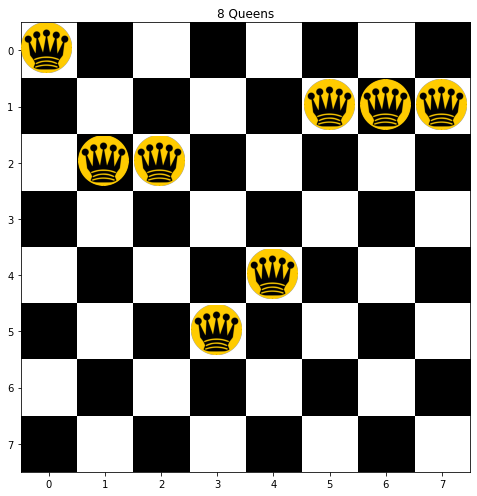

In [48]:
plot_NQueens(nq1.initial)

In [49]:
n1 = Node(state=nq1.initial)
num_conflicts = nq1.h(n1)
print("Initial Conflicts = {0}".format(num_conflicts))

Initial Conflicts = 20


In [50]:
start=time.time()
sol1=hill_climbing(nq1,iterations=20000)
end=time.time()
print("Timetaken={0}".format(end-start))

Goal test succeeded at iteration 20.
Timetaken=0.16256260871887207


In [51]:
sol1.state

(0, 6, 3, 5, 7, 1, 4, 2)

Final Conflicts = 0


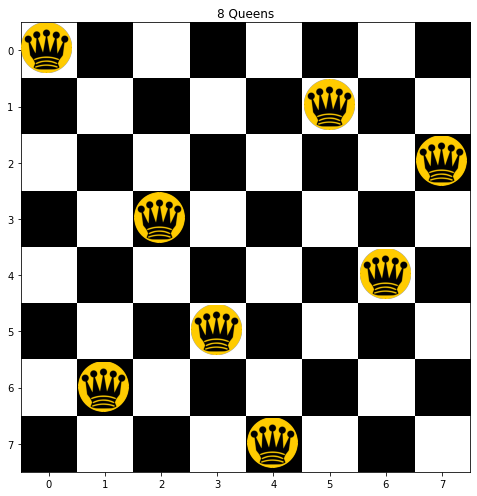

In [52]:
num_conflicts = nq1.h(sol1)
print("Final Conflicts = {0}".format(num_conflicts))
plot_NQueens(list(sol1.state))

The total time required for 20000 iterations is 0.0000 seconds
Type 1:	Iterations:10
Initial Conflicts = 20
(0, 2, 7, 5, 1, 1, 4, 6)
Final Conflicts = 2
The total time required for 20000 iterations is 0.2204 seconds


Type 2:	Iterations:20
Initial Conflicts = 20
(0, 2, 7, 5, 1, 1, 4, 6)
Final Conflicts = 2
The total time required for 20000 iterations is 0.1456 seconds


Type 3:	Iterations:30
Initial Conflicts = 20
Goal test succeeded at iteration 5.
(4, 2, 0, 5, 7, 1, 3, 6)
Final Conflicts = 0
The total time required for 20000 iterations is 0.0568 seconds


Type 4:	Iterations:40
Initial Conflicts = 20
Goal test succeeded at iteration 6.
(0, 6, 3, 5, 7, 1, 4, 2)
Final Conflicts = 0
The total time required for 20000 iterations is 0.0598 seconds


Type 5:	Iterations:50
Initial Conflicts = 20
Goal test succeeded at iteration 6.
(0, 6, 3, 5, 7, 1, 4, 2)
Final Conflicts = 0
The total time required for 20000 iterations is 0.0469 seconds


Type 6:	Iterations:1000
Initial Conflicts = 20
Goal te

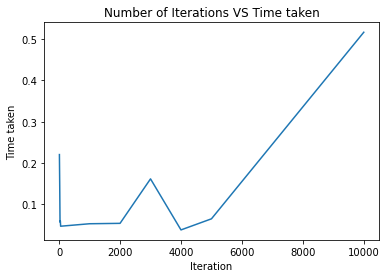

In [54]:
import time
start=time.time()
end=time.time()
print("The total time required for 20000 iterations is {0:.4f} seconds".format(end-start))

iterations=[10,20,30,40,50,1000,2000,3000,4000,5000,10000]
time_taken=[]
num=1
for each_i in iterations:
    print("Type {0}:\tIterations:{1}".format(num,each_i))
    n1 = Node(state=nq1.initial)
    num_conflicts = nq1.h(n1)
    print("Initial Conflicts = {0}".format(num_conflicts))
    start=time.time()
    sol1=hill_climbing(nq1,iterations=each_i)
    end=time.time()
    print(sol1.state)
    num_conflicts = nq1.h(sol1)
    print("Final Conflicts = {0}".format(num_conflicts))
    print("The total time required for 20000 iterations is {0:.4f} seconds\n\n".format(end-start))
    time_taken.append(end-start)
    num+=1
    
plt.title("Number of Iterations VS Time taken")
plt.xlabel("Iteration")
plt.ylabel("Time taken")
plt.plot(iterations,time_taken)
plt.show()    